# Key Levels mix clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.cluster import KMeans
import pickle

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/VN30ps/clusters/birch/VN30F1M_5m_data_train.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = []
dataset

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,cluster
Date,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,-0.7,0.1,-0.7,0.2,-0.6,-0.6,3
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,-0.9,-0.9,-1.6,-0.1,-1.6,-0.8,38
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,-1.2,-0.4,-1.8,-0.8,-1.3,-1.3,38
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,0.0,0.3,-1.0,0.3,-0.9,-0.1,48
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,0.7,0.5,0.4,2.5,0.5,0.8,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,3.0,-0.4,-1.1,2.2,-1.1,2.2,79
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,2.5,3.0,1.0,6.3,6.0,2.6,5
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,2.3,-0.3,1.6,4.8,2.2,2.7,80


In [3]:
data = dataset.copy()
back_bar = 10
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()
data["RSI"] = ta.rsi(data["Close"], length=14)
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_8,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,...,-0.7,0.2,-0.6,-0.6,3,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,...,-1.6,-0.1,-1.6,-0.8,38,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,...,-1.8,-0.8,-1.3,-1.3,38,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,...,-1.0,0.3,-0.9,-0.1,48,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,...,0.4,2.5,0.5,0.8,78,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,...,-1.1,2.2,-1.1,2.2,79,1232.8,NaN,1225.1,NaN,48.767244
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,...,1.0,6.3,6.0,2.6,5,1235.9,NaN,1225.1,NaN,55.098622
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,...,1.6,4.8,2.2,2.7,80,1236.5,NaN,1226.1,NaN,54.374963


In [4]:
data.dropna(inplace=True)
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,RSI,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 10:20:00,901.1,901.2,899.3,899.3,1796,-1.9,0.0,-1.8,-2.2,-0.3,...,-0.6,-0.4,83,901.5,901.2,897.7,895.4,48.782768,False,False
2020-11-02 10:25:00,899.1,900.3,898.8,899.9,1917,-0.4,1.1,0.8,-1.3,0.6,...,0.3,-1.3,26,901.5,900.4,897.7,895.4,52.422074,False,False
2020-11-02 10:30:00,900.0,900.1,899.3,900.0,1150,-0.1,0.7,0.0,-0.3,1.2,...,-1.1,0.7,3,901.5,900.4,897.7,895.4,53.021227,False,False
2020-11-02 10:35:00,899.6,900.4,899.1,899.4,1106,-1.0,0.3,-0.2,-0.7,0.1,...,0.3,-0.5,3,901.5,900.4,898.1,895.4,49.031500,False,False
2020-11-02 10:40:00,899.2,899.4,898.8,899.4,1652,0.0,0.6,0.2,-1.0,0.3,...,-0.6,-0.6,3,901.5,900.2,898.6,895.4,49.031500,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 13:30:00,1231.3,1232.8,1228.1,1228.1,10045,-4.7,0.0,-3.2,-3.8,-0.4,...,-0.3,-0.5,9,1234.0,1232.8,1226.5,1225.1,42.979015,False,False
2024-04-26 13:35:00,1228.0,1228.8,1225.1,1228.5,11359,-0.3,3.4,0.5,-4.3,0.4,...,-0.1,-2.8,56,1232.8,1235.9,1225.1,1225.1,44.133669,False,True
2024-04-26 13:40:00,1229.1,1230.2,1228.6,1229.0,5461,-1.2,0.4,-0.1,0.2,3.9,...,-2.3,0.9,54,1232.8,1236.5,1225.1,1226.1,45.616125,False,False


In [5]:
data['prev_is_r_keylevel'] = data['is_r_keylevel'].shift(1)
data['prev_is_s_keylevel'] = data['is_s_keylevel'].shift(1)

In [6]:
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,cluster,max_prev,max_next,min_prev,min_next,RSI,is_r_keylevel,is_s_keylevel,prev_is_r_keylevel,prev_is_s_keylevel
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 10:20:00,901.1,901.2,899.3,899.3,1796,-1.9,0.0,-1.8,-2.2,-0.3,...,83,901.5,901.2,897.7,895.4,48.782768,False,False,NaN,NaN
2020-11-02 10:25:00,899.1,900.3,898.8,899.9,1917,-0.4,1.1,0.8,-1.3,0.6,...,26,901.5,900.4,897.7,895.4,52.422074,False,False,False,False
2020-11-02 10:30:00,900.0,900.1,899.3,900.0,1150,-0.1,0.7,0.0,-0.3,1.2,...,3,901.5,900.4,897.7,895.4,53.021227,False,False,False,False
2020-11-02 10:35:00,899.6,900.4,899.1,899.4,1106,-1.0,0.3,-0.2,-0.7,0.1,...,3,901.5,900.4,898.1,895.4,49.031500,False,False,False,False
2020-11-02 10:40:00,899.2,899.4,898.8,899.4,1652,0.0,0.6,0.2,-1.0,0.3,...,3,901.5,900.2,898.6,895.4,49.031500,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 13:30:00,1231.3,1232.8,1228.1,1228.1,10045,-4.7,0.0,-3.2,-3.8,-0.4,...,9,1234.0,1232.8,1226.5,1225.1,42.979015,False,False,False,False
2024-04-26 13:35:00,1228.0,1228.8,1225.1,1228.5,11359,-0.3,3.4,0.5,-4.3,0.4,...,56,1232.8,1235.9,1225.1,1225.1,44.133669,False,True,False,False
2024-04-26 13:40:00,1229.1,1230.2,1228.6,1229.0,5461,-1.2,0.4,-0.1,0.2,3.9,...,54,1232.8,1236.5,1225.1,1226.1,45.616125,False,False,False,True


In [7]:
supply_data = data[data['prev_is_r_keylevel'] == True]
demand_data = data[data['prev_is_s_keylevel'] == True]
normal_data = data[(data['prev_is_r_keylevel'] != True) & (data['prev_is_s_keylevel'] != True)]

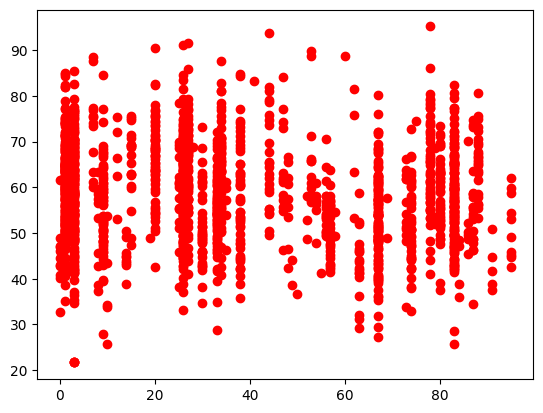

In [8]:
plt.scatter(supply_data['cluster'], supply_data['RSI'], c='red')

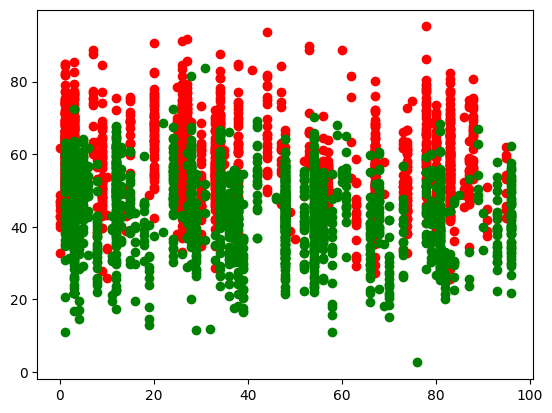

In [9]:
plt.scatter(supply_data['cluster'], supply_data['RSI'], c='red')
plt.scatter(demand_data['cluster'], demand_data['RSI'], c='green')
# plt.scatter(normal_data['cluster'], normal_data['RSI'], c='yellow')

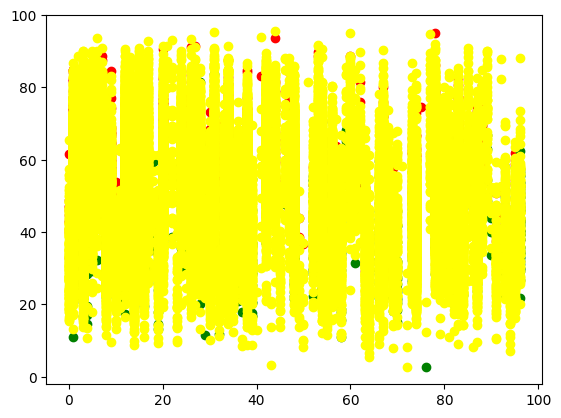

In [10]:
plt.scatter(supply_data['cluster'], supply_data['RSI'], c='red')
plt.scatter(demand_data['cluster'], demand_data['RSI'], c='green')
plt.scatter(normal_data['cluster'], normal_data['RSI'], c='yellow')

In [11]:
#Short
grouped_a = supply_data[['cluster']].groupby([supply_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_a['count'].sort_values(ascending=False).index

Index([ 1,  3, 26, 83, 67, 33,  9, 27, 20, 34, 78, 38, 80, 74, 30, 57, 88, 44,
       87, 15, 56, 63, 25, 73, 47, 53,  7,  8,  0, 95, 48, 14, 54,  2, 86, 91,
       10, 35, 12, 62, 84, 79, 52, 49, 69, 58, 19, 75, 55, 41, 60, 50, 28],
      dtype='int64', name='cluster')

In [12]:
#Long
grouped_b = demand_data[['cluster']].groupby([demand_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_b['count'].sort_values(ascending=False).tail(99).index

Index([48,  3, 54, 12, 28, 81, 34, 96,  5, 38, 56, 36, 24,  1, 68,  8, 66, 93,
       29, 52, 37, 39, 42, 78, 79, 70, 61, 15, 13, 58, 73, 18, 82,  6, 19, 11,
       27, 84,  4, 16, 89, 31, 87, 80, 59, 60, 67,  2, 33, 90, 26, 69, 22, 46,
       83, 76, 85, 32, 20],
      dtype='int64', name='cluster')

In [13]:
#None
grouped_c = normal_data[['cluster']].groupby([normal_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_c['count'].sort_values(ascending=False).count()

96